#PDF files do not have any specific structure,Because its all about presenting imformation.

In [72]:
!pip install pdfplumber

In [73]:
#importing lab
import pandas as pd
import numpy as np
import pdfplumber as pb

In [74]:
#reading pdf file
pdf = pb.open('/content/Pdft_to_extract.pdf')


In [75]:
#first page of pdf
first_page = pdf.pages[0]


In [76]:
#
rows = first_page.extract_text().split('\n')
rows

['QF 1.100 (Build 1010) CWC Software, Inc. Page: 1',
 'Batch: 181 Test Mode Accounts Receivable Report Detailed by Company 03/14/16, 11:23:32',
 'Sorted by Customer',
 'Order Invoice Amount Payment Not',
 'Name/Company Telephone Publication Number Date Qty Paid Date Invoiced Current 31-60 61-90 Over 90 ST',
 'Barrow, Mr. Clyde AIC 2968 02/25/16 1 0.00 0.00 240.00 0.00 0.00 0.00 A',
 'Brown, Ms. Ida QWKFIL 2301 02/05/16 1 75.00 02/05/16 0.00 0.00 45.00 0.00 0.00 A',
 'Bush, Mr. George W. AIC 3086 1 0.00 216.00 0.00 0.00 0.00 0.00 A',
 'QWKFIL 3075 1 0.00 108.00 0.00 0.00 0.00 0.00 A',
 '0.00 324.00 0.00 0.00 0.00 0.00',
 'Clinton, Mr. Bill AIC 3064 1 0.00 216.00 0.00 0.00 0.00 0.00 A',
 'QWKFIL 3053 1 0.00 108.00 0.00 0.00 0.00 0.00 A',
 '0.00 324.00 0.00 0.00 0.00 0.00',
 'Crewe, Mr. Ralph QWKFIL 2753 01/01/16 1 0.00 0.00 0.00 0.00 79.50 0.00 Sn',
 'Manette, Mr. Alexander QWKFIL 2571 02/01/16 1 0.00 0.00 0.00 75.00 0.00 0.00 Sn',
 'Parker, Ms. Bonnie AIC 2979 02/25/16 1 0.00 0.00 240.0

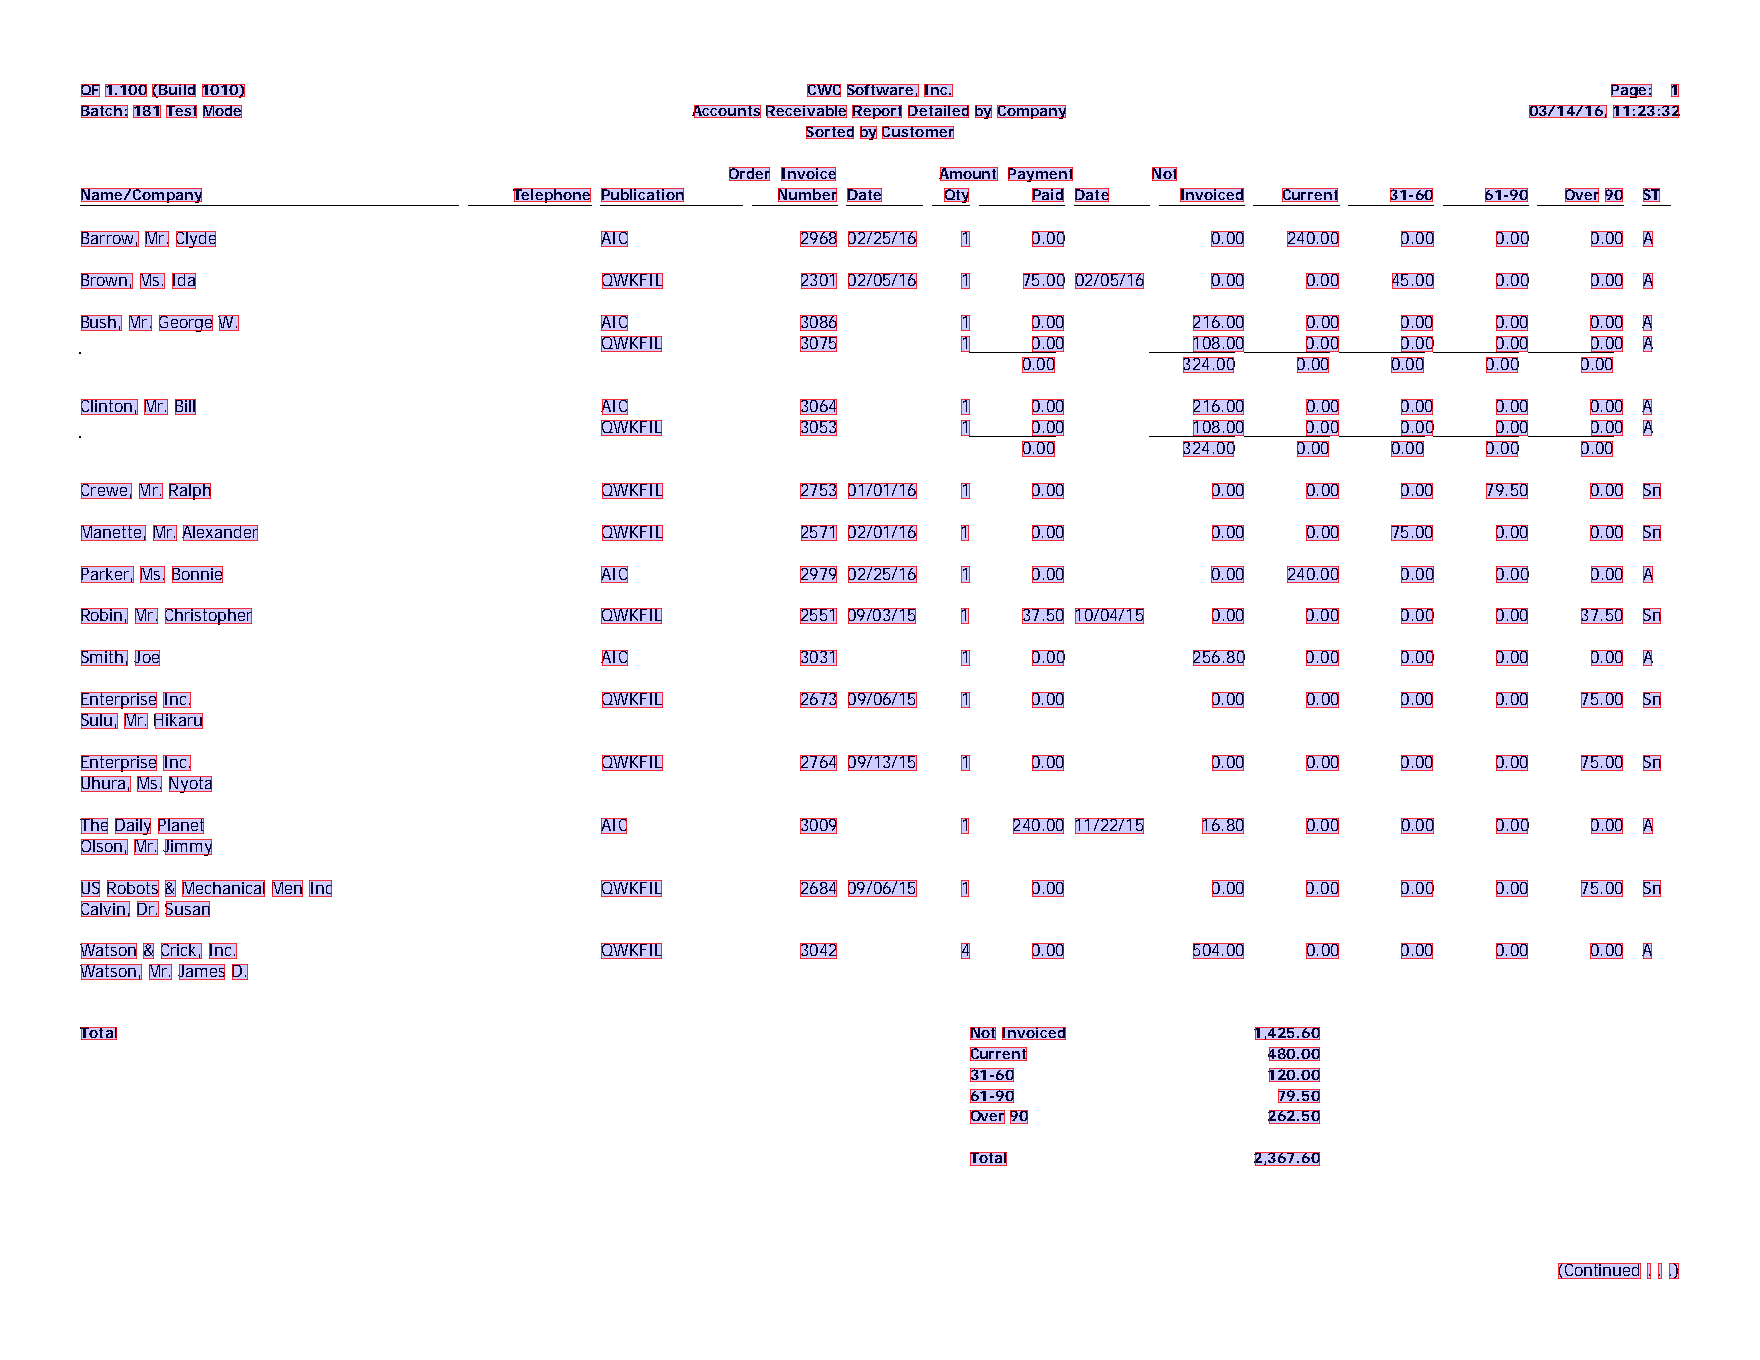

In [77]:
#Here we are identifying what pdfpluber is considering 'words'
image = first_page.to_image(resolution = 160).outline_words()
image

In [78]:
words_rows = first_page.extract_words()
words_rows

[{'text': 'QF',
  'x0': 36.0,
  'x1': 45.0626653,
  'top': 37.39178360000005,
  'doctop': 37.39178360000005,
  'bottom': 44.10238360000005,
  'upright': True,
  'height': 6.7105999999999995,
  'width': 9.062665299999999,
  'direction': 'ltr'},
 {'text': '1.100',
  'x0': 47.03960806,
  'x1': 66.22521346,
  'top': 37.39178360000005,
  'doctop': 37.39178360000005,
  'bottom': 44.10238360000005,
  'upright': True,
  'height': 6.7105999999999995,
  'width': 19.185605400000007,
  'direction': 'ltr'},
 {'text': '(Build',
  'x0': 68.20215622,
  'x1': 88.43193098,
  'top': 37.39178360000005,
  'doctop': 37.39178360000005,
  'bottom': 44.10238360000005,
  'upright': True,
  'height': 6.7105999999999995,
  'width': 20.229774759999998,
  'direction': 'ltr'},
 {'text': '1010)',
  'x0': 90.40887373999999,
  'x1': 110.54067373999999,
  'top': 37.39178360000005,
  'doctop': 37.39178360000005,
  'bottom': 44.10238360000005,
  'upright': True,
  'height': 6.7105999999999995,
  'width': 20.1318,
  'direc

In [79]:
for word in words_rows:
  if word['text'] == 'Name/Company':
    x0 = word['x0']
    top = word['top']
  if word['text'] == 'Watson':
    bottom = word['bottom']
  if word['text'] == 'ST':
    x1 = word['x1']

box = (x0,top,x1,bottom)
box


(36.000671059999945, 84.49080076000007, 747.2647628999999, 431.98741578)

In [80]:
#now we can crop the table
#Now we can crop the page starting with Name/Company for our upper and left bound, to right of 'ST' and bottom of "Watson"
new_page = first_page.crop(bbox=box)



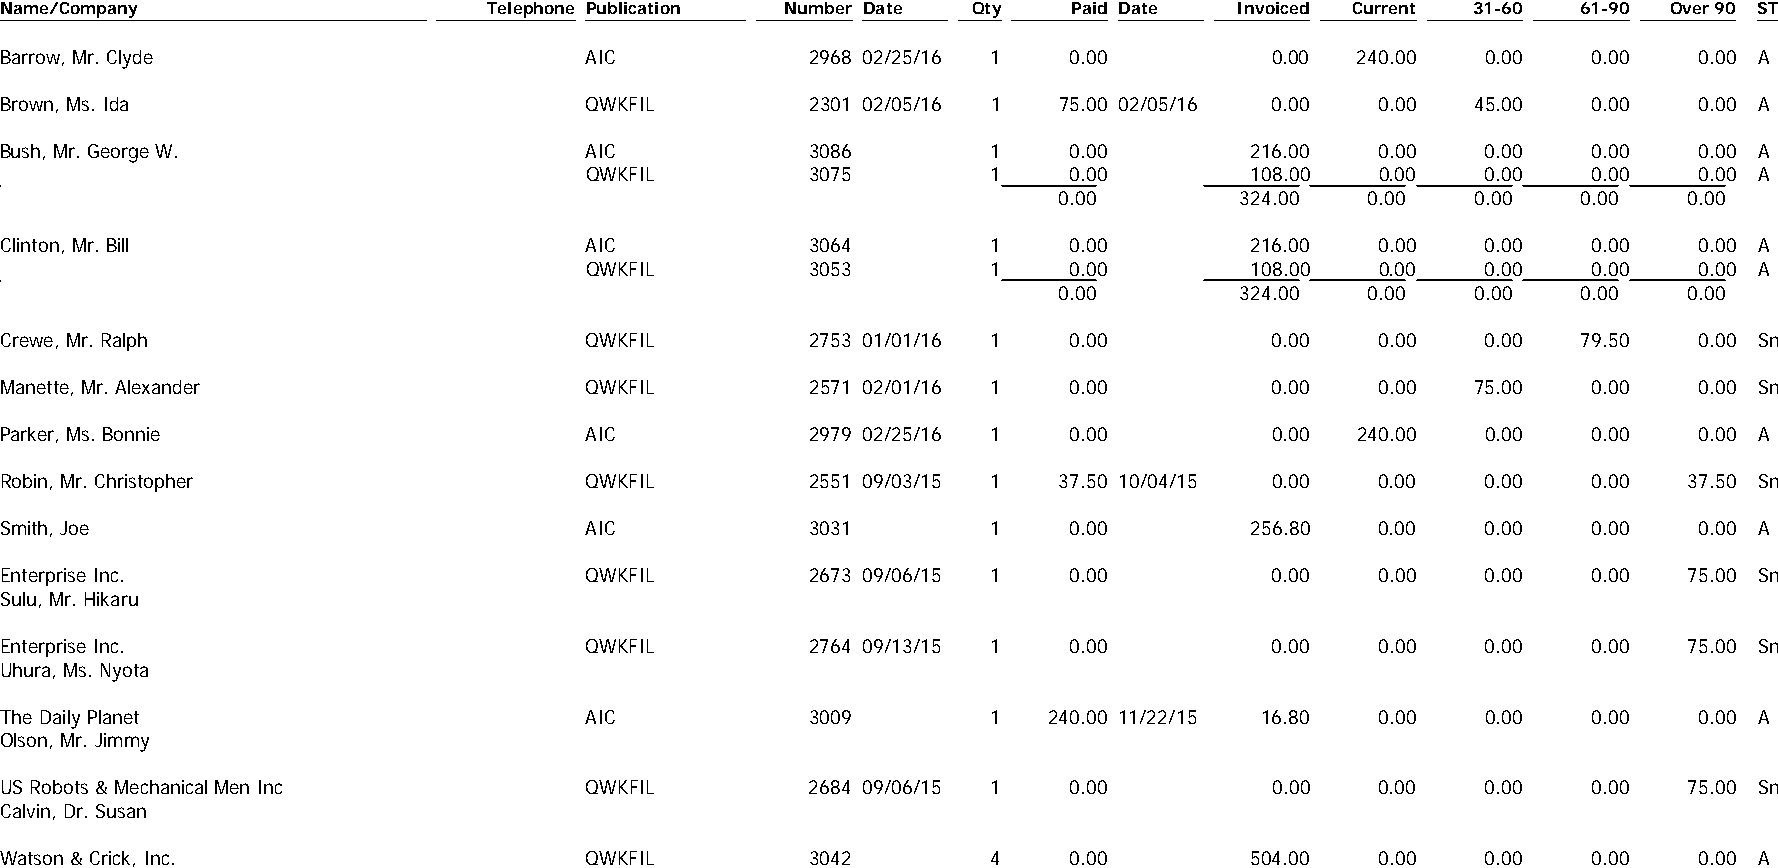

In [81]:
new_page.to_image(resolution = 180)

In [82]:
table_settings = table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text"
}
table = new_page.extract_table(table_settings)
#If our table had boundry line then it would have become easy easy to extract rows and columns


In [83]:
#
for rows in table[:10]:
  print(rows)


['Name/Company Telephone', 'Publication', 'Number', 'Date', 'Qty', 'Paid', 'Date', 'Invoiced', 'Current', '31-60', '61-90 Ov', 'er 90', 'ST']
['', '', '', '', '', '', '', '', '', '', '', '', '']
['Barrow, Mr. Clyde', 'AIC', '2968', '02/25/16', '1', '0.00', '', '0.00', '240.00', '0.00', '0.00', '0.00', 'A']
['', '', '', '', '', '', '', '', '', '', '', '', '']
['Brown, Ms. Ida', 'QWKFIL', '2301', '02/05/16', '1', '75.00', '02/05/16', '0.00', '0.00', '45.00', '0.00', '0.00', 'A']
['', '', '', '', '', '', '', '', '', '', '', '', '']
['Bush, Mr. George W.', 'AIC', '3086', '', '1', '0.00', '', '216.00', '0.00', '0.00', '0.00', '0.00', 'A']
['', 'QWKFIL', '3075', '', '1', '0.00', '', '108.00', '0.00', '0.00', '0.00', '0.00', 'A']
['', '', '', '', '', '0.00', '', '324.00', '0.00', '0.00', '0.00', '0.00', '']
['', '', '', '', '', '', '', '', '', '', '', '', '']


In [84]:
table = [rows for rows in table if ''.join([str(i) for i in rows]) != '']
table

[['Name/Company Telephone',
  'Publication',
  'Number',
  'Date',
  'Qty',
  'Paid',
  'Date',
  'Invoiced',
  'Current',
  '31-60',
  '61-90 Ov',
  'er 90',
  'ST'],
 ['Barrow, Mr. Clyde',
  'AIC',
  '2968',
  '02/25/16',
  '1',
  '0.00',
  '',
  '0.00',
  '240.00',
  '0.00',
  '0.00',
  '0.00',
  'A'],
 ['Brown, Ms. Ida',
  'QWKFIL',
  '2301',
  '02/05/16',
  '1',
  '75.00',
  '02/05/16',
  '0.00',
  '0.00',
  '45.00',
  '0.00',
  '0.00',
  'A'],
 ['Bush, Mr. George W.',
  'AIC',
  '3086',
  '',
  '1',
  '0.00',
  '',
  '216.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'A'],
 ['',
  'QWKFIL',
  '3075',
  '',
  '1',
  '0.00',
  '',
  '108.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'A'],
 ['',
  '',
  '',
  '',
  '',
  '0.00',
  '',
  '324.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  ''],
 ['Clinton, Mr. Bill',
  'AIC',
  '3064',
  '',
  '1',
  '0.00',
  '',
  '216.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'A'],
 ['',
  'QWKFIL',
  '3053',
  '',
  '1',
  '0.00',
  '',
  '

In [85]:
df = pd.DataFrame(table)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Invoiced,Current,31-60,61-90 Ov,er 90,ST
1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,,0.00,240.00,0.00,0.00,0.00,A
2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0.00,0.00,45.00,0.00,0.00,A
3,"Bush, Mr. George W.",AIC,3086,,1,0.00,,216.00,0.00,0.00,0.00,0.00,A
4,,QWKFIL,3075,,1,0.00,,108.00,0.00,0.00,0.00,0.00,A


In [86]:
columns = df.iloc[0]
columns

0     Name/Company Telephone
1                Publication
2                     Number
3                       Date
4                        Qty
5                       Paid
6                       Date
7                   Invoiced
8                    Current
9                      31-60
10                  61-90 Ov
11                     er 90
12                        ST
Name: 0, dtype: object

In [87]:
#we need to change 61-90 Ov, er 90, Invoiced
columns[7],columns[10],columns[11] = 'Not Invoice','61-90','Over 90'
df.columns = columns
df.head()


,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Not Invoice,Current,31-60,61-90,Over 90,ST
0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Not Invoice,Current,31-60,61-90,Over 90,ST
1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,,0.00,240.00,0.00,0.00,0.00,A
2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0.00,0.00,45.00,0.00,0.00,A
3,"Bush, Mr. George W.",AIC,3086,,1,0.00,,216.00,0.00,0.00,0.00,0.00,A
4,,QWKFIL,3075,,1,0.00,,108.00,0.00,0.00,0.00,0.00,A


In [88]:
df.drop(0)

,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Not Invoice,Current,31-60,61-90,Over 90,ST
1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,,0.00,240.00,0.00,0.00,0.00,A
2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0.00,0.00,45.00,0.00,0.00,A
3,"Bush, Mr. George W.",AIC,3086,,1,0.00,,216.00,0.00,0.00,0.00,0.00,A
4,,QWKFIL,3075,,1,0.00,,108.00,0.00,0.00,0.00,0.00,A
5,,,,,,0.00,,324.00,0.00,0.00,0.00,0.00,
6,"Clinton, Mr. Bill",AIC,3064,,1,0.00,,216.00,0.00,0.00,0.00,0.00,A
7,,QWKFIL,3053,,1,0.00,,108.00,0.00,0.00,0.00,0.00,A
8,,,,,,0.00,,324.00,0.00,0.00,0.00,0.00,
9,"Crewe, Mr. Ralph",QWKFIL,2753,01/01/16,1,0.00,,0.00,0.00,0.00,79.50,0.00,Sn
10,"Manette, Mr. Alexander",QWKFIL,2571,02/01/16,1,0.00,,0.00,0.00,75.00,0.00,0.00,Sn


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name/Company Telephone  23 non-null     object
 1   Publication             23 non-null     object
 2   Number                  23 non-null     object
 3   Date                    23 non-null     object
 4   Qty                     23 non-null     object
 5   Paid                    23 non-null     object
 6   Date                    23 non-null     object
 7   Not Invoice             23 non-null     object
 8   Current                 23 non-null     object
 9   31-60                   23 non-null     object
 10  61-90                   23 non-null     object
 11  Over 90                 23 non-null     object
 12  ST                      23 non-null     object
dtypes: object(13)
memory usage: 2.5+ KB


In [99]:
#furthure we can change the data type of columns
def convert_to_float(num):
  try:
    return num.replce(',','').astype('float')
  except:
    return 0
for col in ['Not Invoice','Current','31-60','61-90','Over 90']:
  df[col] = df[col].apply(convert_to_float)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name/Company Telephone  23 non-null     object
 1   Publication             23 non-null     object
 2   Number                  23 non-null     object
 3   Date                    23 non-null     object
 4   Qty                     23 non-null     object
 5   Paid                    23 non-null     object
 6   Date                    23 non-null     object
 7   Not Invoice             23 non-null     int64 
 8   Current                 23 non-null     int64 
 9   31-60                   23 non-null     int64 
 10  61-90                   23 non-null     int64 
 11  Over 90                 23 non-null     int64 
 12  ST                      23 non-null     object
dtypes: int64(5), object(8)
memory usage: 2.5+ KB


In [101]:
df.head()

,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Not Invoice,Current,31-60,61-90,Over 90,ST
0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,0,0,0,0,0,ST
1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,,0,0,0,0,0,A
2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0,0,0,0,0,A
3,"Bush, Mr. George W.",AIC,3086,,1,0.00,,0,0,0,0,0,A
4,,QWKFIL,3075,,1,0.00,,0,0,0,0,0,A


In [102]:
#remove empty rows so that we can use data in furthure analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name/Company Telephone  23 non-null     object
 1   Publication             23 non-null     object
 2   Number                  23 non-null     object
 3   Date                    23 non-null     object
 4   Qty                     23 non-null     object
 5   Paid                    23 non-null     object
 6   Date                    23 non-null     object
 7   Not Invoice             23 non-null     int64 
 8   Current                 23 non-null     int64 
 9   31-60                   23 non-null     int64 
 10  61-90                   23 non-null     int64 
 11  Over 90                 23 non-null     int64 
 12  ST                      23 non-null     object
dtypes: int64(5), object(8)
memory usage: 2.5+ KB


In [107]:
df['Name/Company Telephone'] = df['Name/Company Telephone'].replace('',np.nan).ffill()
df.head()

,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,Not Invoice,Current,31-60,61-90,Over 90,ST
0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,0,0,0,0,0,ST
1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,,0,0,0,0,0,A
2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0,0,0,0,0,A
3,"Bush, Mr. George W.",AIC,3086,,1,0.00,,0,0,0,0,0,A
4,"Bush, Mr. George W.",QWKFIL,3075,,1,0.00,,0,0,0,0,0,A


In [108]:
df.to_csv('task_done.csv')

In [109]:
pd.read_csv('task_done.csv')

,Unnamed: 0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date.1,Not Invoice,Current,31-60,61-90,Over 90,ST
0,0,Name/Company Telephone,Publication,Number,Date,Qty,Paid,Date,0,0,0,0,0,ST
1,1,"Barrow, Mr. Clyde",AIC,2968,02/25/16,1,0.00,NaN,0,0,0,0,0,A
2,2,"Brown, Ms. Ida",QWKFIL,2301,02/05/16,1,75.00,02/05/16,0,0,0,0,0,A
3,3,"Bush, Mr. George W.",AIC,3086,NaN,1,0.00,NaN,0,0,0,0,0,A
4,4,"Bush, Mr. George W.",QWKFIL,3075,NaN,1,0.00,NaN,0,0,0,0,0,A
5,5,"Bush, Mr. George W.",NaN,NaN,NaN,NaN,0.00,NaN,0,0,0,0,0,NaN
6,6,"Clinton, Mr. Bill",AIC,3064,NaN,1,0.00,NaN,0,0,0,0,0,A
7,7,"Clinton, Mr. Bill",QWKFIL,3053,NaN,1,0.00,NaN,0,0,0,0,0,A
8,8,"Clinton, Mr. Bill",NaN,NaN,NaN,NaN,0.00,NaN,0,0,0,0,0,NaN
9,9,"Crewe, Mr. Ralph",QWKFIL,2753,01/01/16,1,0.00,NaN,0,0,0,0,0,Sn
